In [1]:
import pandas as pd
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import datetime

years = range(2022, datetime.date.today().year+1)
days_in_year = pd.Series(pd.date_range("2000", freq="D", periods=366)).dt.strftime('%d.%m').values

# Elektrika 

In [2]:
#import csv
csvs = []
for i,year in enumerate(years):
    csv = pd.read_csv('data/elektro-'+str(year)+'.csv',parse_dates=["Datum"])
    csv = (csv.set_index('Datum')
      .reindex(pd.date_range(csv['Datum'].min(), csv['Datum'].max(), freq="D"))
      .rename_axis(['Datum'])
      .reset_index())
    csvs.append(csv)
#csv

In [3]:
#interpolated
csvs_filled = []
for csv in csvs:
    csvs_filled.append(csv.interpolate())

## Pridelava elektrike

### ...po dnevih

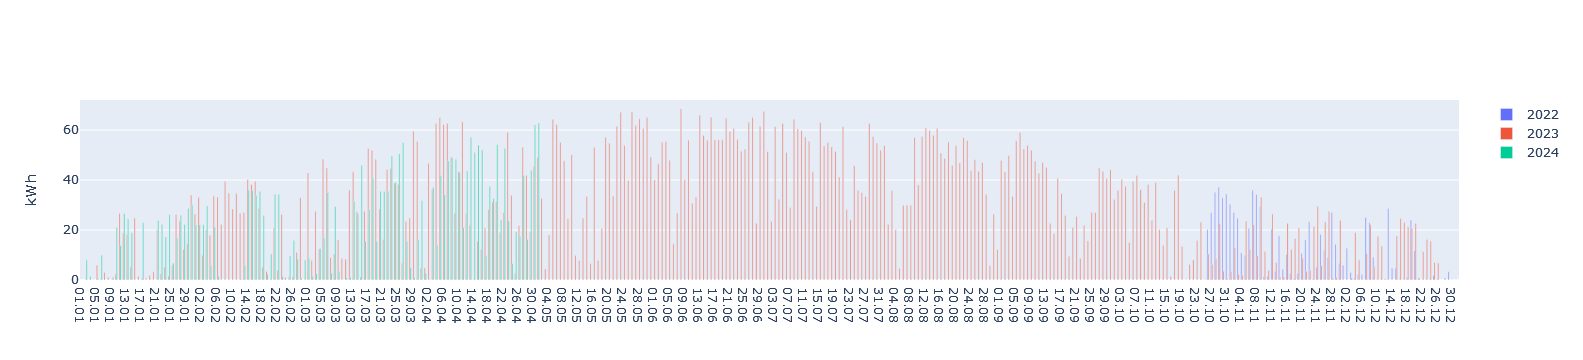

In [4]:
fig = go.Figure()
for i,csv in enumerate(csvs_filled):
    oddana_per_day = csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0]);
    fig.add_traces(go.Bar(name=str(years[i]), x=csv['Datum'].dt.strftime('%d.%m'), y = oddana_per_day))

fig.update_layout(barmode='group')
fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified', yaxis=dict(title="kWh"))

fig.show()

### ...skupno

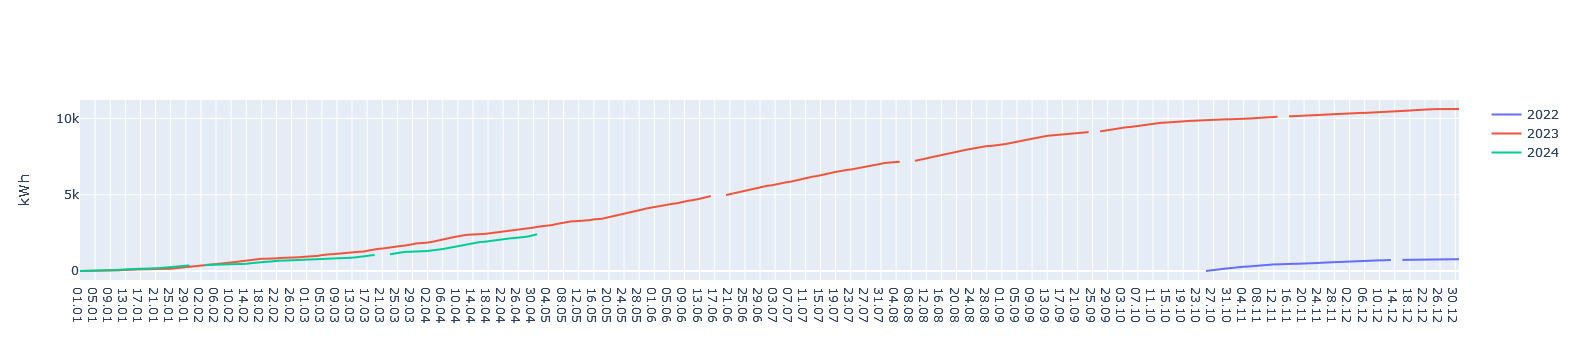

In [5]:
fig = go.Figure()
for i,csv in enumerate(csvs):
    skupna_oddana_letno = (csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0])).cumsum();
    fig.add_traces(go.Scatter(name=str(years[i]), x=csv['Datum'].dt.strftime('%d.%m'), y = skupna_oddana_letno))

fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified', yaxis=dict(title="kWh"), xaxis_tickformat='%d-%b')
fig.show()

## Poraba elektrike

### ...po dnevih

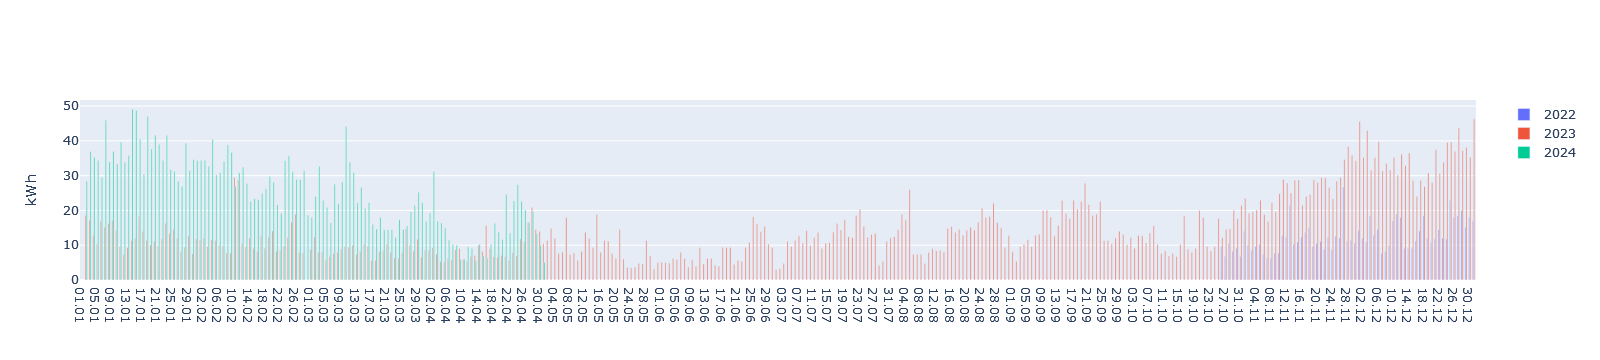

In [6]:
fig = go.Figure()
for i,csv in enumerate(csvs_filled):
    poraba_per_day = csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0]);
    fig.add_traces(go.Bar(name=str(years[i]), x=csv['Datum'].dt.strftime('%d.%m'), y = poraba_per_day))

fig.update_layout(barmode='group')
fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified', yaxis=dict(title="kWh"))
fig.show()

### ...skupno

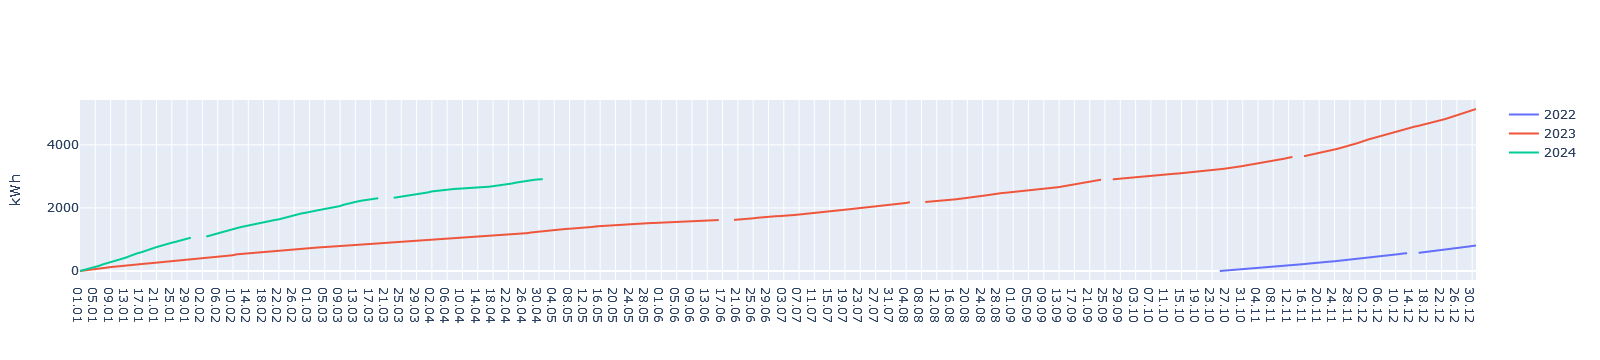

In [7]:
fig = go.Figure()
for i,csv in enumerate(csvs):
    skupna_poraba_letno = (csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0])).cumsum();
    fig.add_traces(go.Scatter(name=str(years[i]), x=csv['Datum'].dt.strftime('%d.%m'), y = skupna_poraba_letno))

fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified', yaxis=dict(title="kWh"))
fig.show()

## Presek porabe in odjema

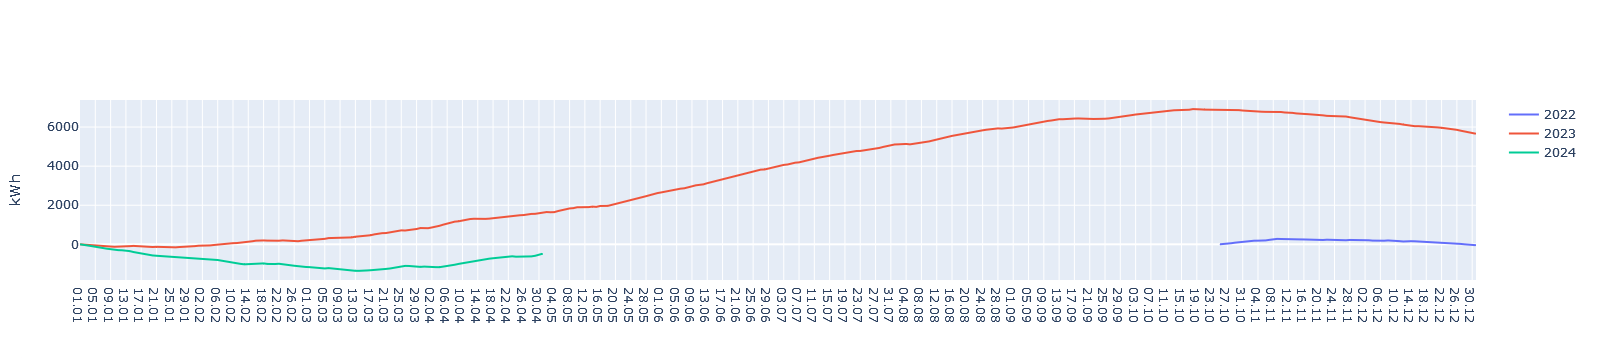

In [8]:
fig = go.Figure()
for i,csv in enumerate(csvs_filled):
    skupna_poraba_letno = (csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0])).cumsum();
    skupna_oddana_letno = (csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0])).cumsum();
    pm = skupna_oddana_letno - skupna_poraba_letno
    
    fig.add_trace(go.Scatter(x=csv['Datum'].dt.strftime('%d.%m'), y = pm, name=str(years[i])))

fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified', yaxis=dict(title="kWh"))
fig.show()

### Dnevno po letih

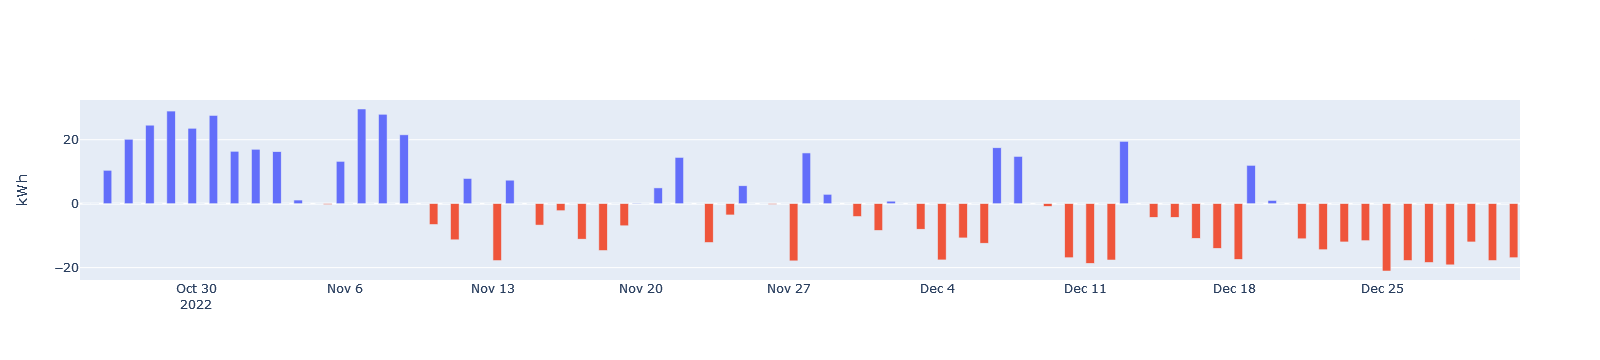

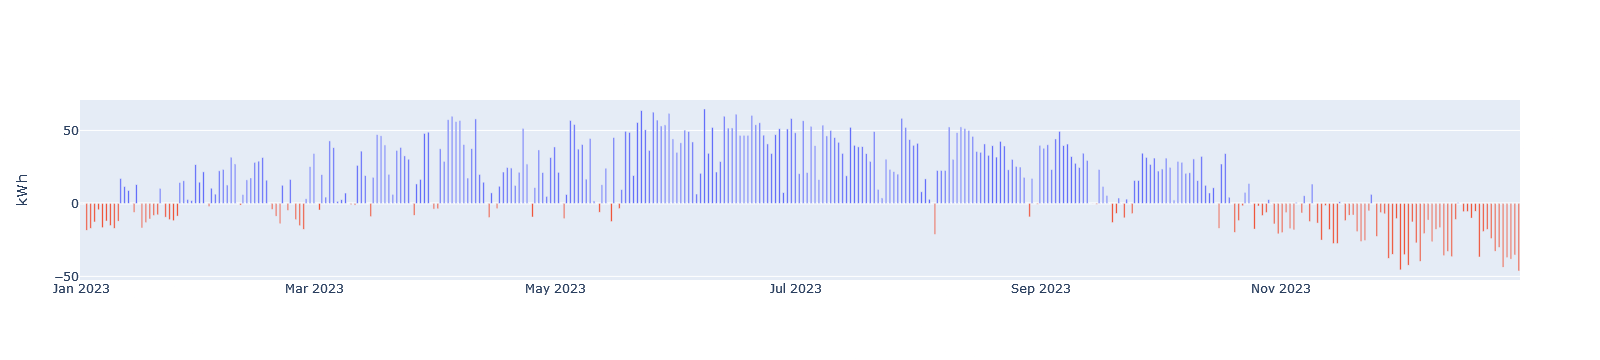

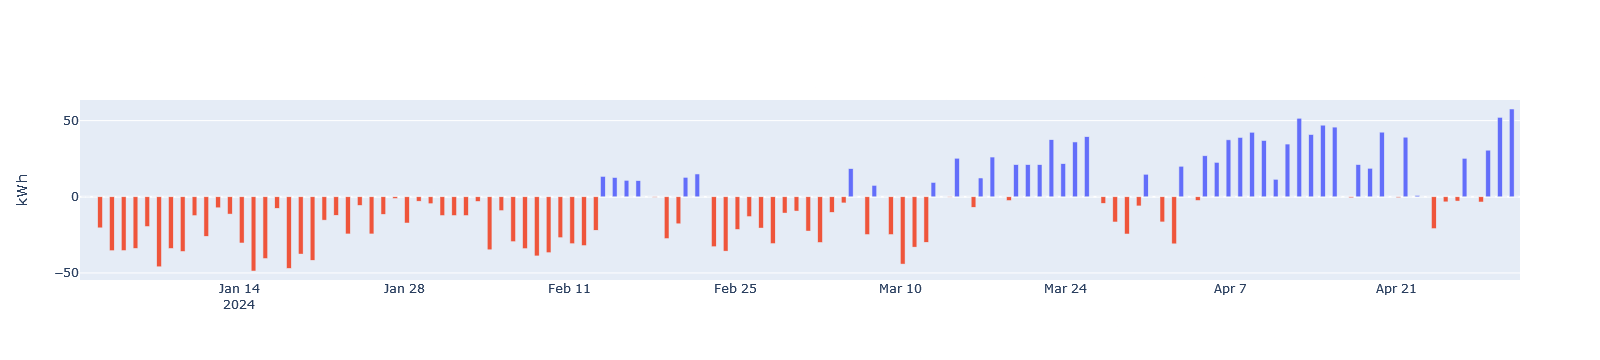

In [9]:
for i,csv in enumerate(csvs_filled):
    prejeta_per_day = csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0]);
    oddana_per_day = csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0]);
    
    pm = oddana_per_day - prejeta_per_day
    
    mask = pm >= 0
    plus = np.where(mask, pm, 0)
    minus = np.where(mask, 0, pm)
    
    fig = go.Figure()
    fig.add_traces(go.Bar(x=csv['Datum'], y = plus, name=""))
    fig.add_traces(go.Bar(x=csv['Datum'], y = minus, name=""))
    fig.update_layout(hovermode='x unified',showlegend=False, yaxis=dict(title="kWh"))
    fig.show()

### Skupno po letih

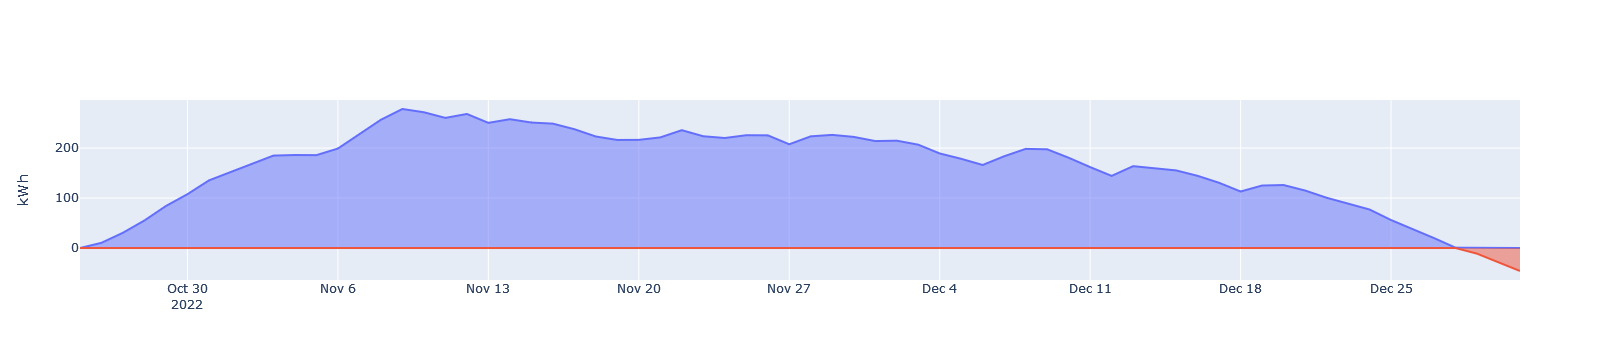

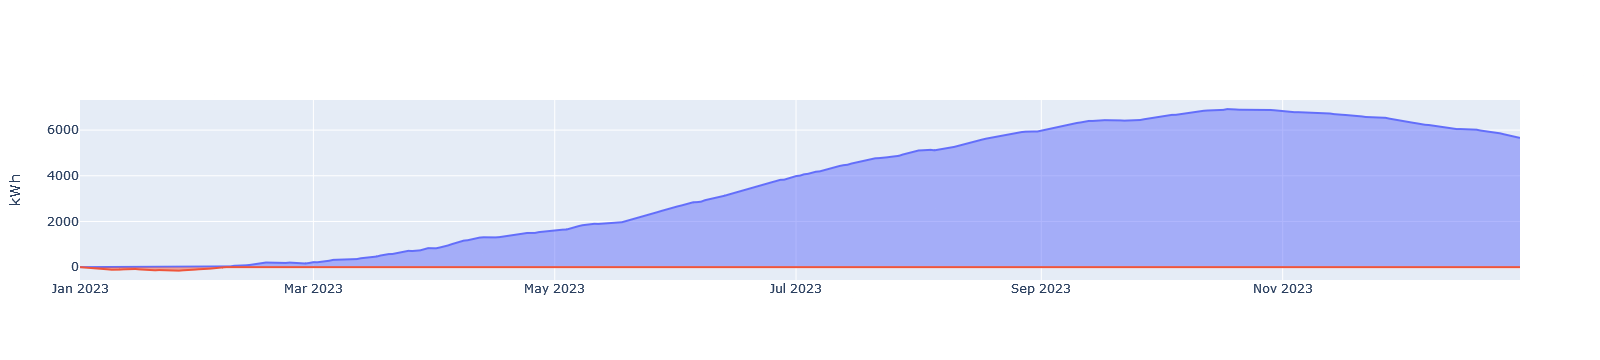

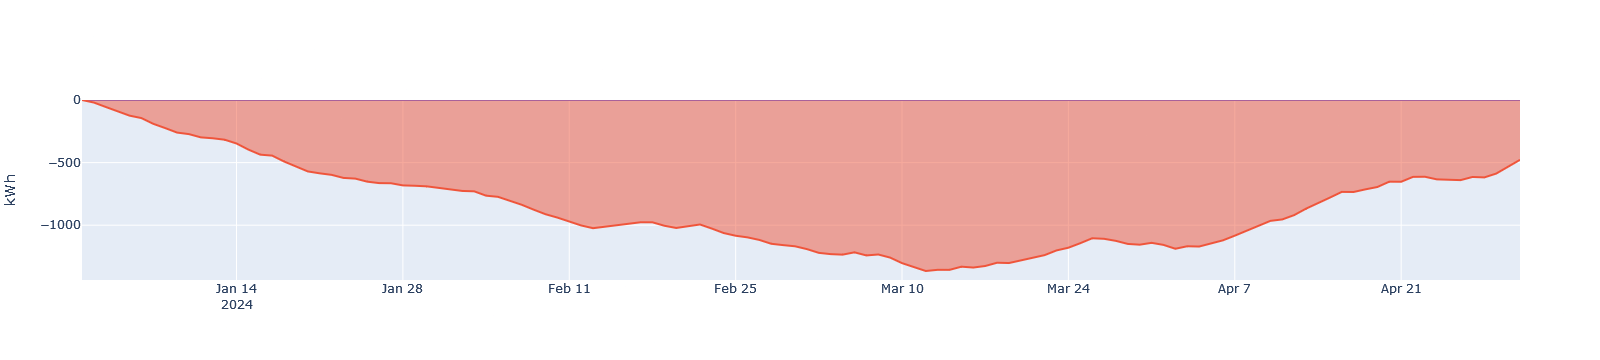

In [10]:
for i,csv in enumerate(csvs_filled):
    skupna_poraba_letno = (csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0])).cumsum();
    skupna_oddana_letno = (csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0])).cumsum();

    pm = skupna_oddana_letno - skupna_poraba_letno
    
    mask = pm >= 0
    plus = np.where(mask, pm, 0)
    minus = np.where(mask, 0, pm)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=csv['Datum'], y = plus, fill='tozeroy', name=""))
    fig.add_trace(go.Scatter(x=csv['Datum'], y = minus, fill='tozeroy', name=""))
    fig.update_layout(hovermode='x unified',showlegend=False, yaxis=dict(title="kWh"))
    fig.show()

## Temperature

In [11]:
#import csv
temps = []
for i,year in enumerate(years):
    csv = pd.read_csv('data/temp-'+str(year)+'.csv',parse_dates=["Timestamp"])
    csv.index = pd.DatetimeIndex(csv['Timestamp'])
    temps.append(csv)
csv

,Timestamp,Zunanja temperatura
Timestamp,,
2024-05-02 16:02:52,2024-05-02 16:02:52,15.2
2024-05-02 16:01:52,2024-05-02 16:01:52,15.3
2024-05-02 16:00:52,2024-05-02 16:00:52,15.5
2024-05-02 15:59:52,2024-05-02 15:59:52,15.6
2024-05-02 15:58:52,2024-05-02 15:58:52,15.8
...,...,...
2024-01-01 00:04:58,2024-01-01 00:04:58,12.9
2024-01-01 00:03:58,2024-01-01 00:03:58,12.8
2024-01-01 00:02:59,2024-01-01 00:02:59,12.8


In [12]:
"""for i,csv in enumerate(temps):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=csv['Timestamp'], y = csv['Zunanja temperatura'], name=""))
    fig.update_layout(hovermode='x unified',showlegend=False, yaxis=dict(title="Temperatura"))
    fig.show()"""

'for i,csv in enumerate(temps):\n    fig = go.Figure()\n    fig.add_trace(go.Scatter(x=csv[\'Timestamp\'], y = csv[\'Zunanja temperatura\'], name=""))\n    fig.update_layout(hovermode=\'x unified\',showlegend=False, yaxis=dict(title="Temperatura"))\n    fig.show()'